In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph
from misc import *
import random
import numpy as np

In [2]:
n = 5
grid = GridInstance(n=n)

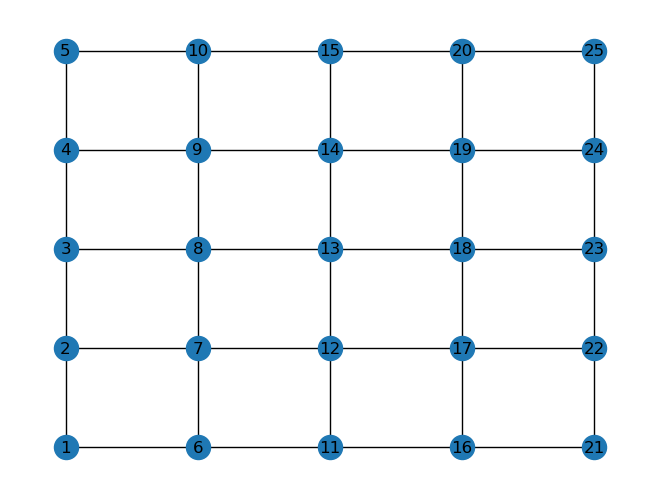

In [3]:
grid.showGraph()

In [4]:
nodes = list(grid.nodes)
random.shuffle(nodes)

In [5]:
nodes

[10,
 11,
 17,
 24,
 15,
 14,
 3,
 25,
 9,
 6,
 16,
 2,
 21,
 1,
 4,
 8,
 7,
 12,
 5,
 18,
 20,
 19,
 22,
 23,
 13]

In [6]:
def RDFS(nodes,edges):
    #1 -> white 
    #0 -> black
    #-1 -> gray
    def adjw(s):
        """
        get neighbours of a node s in a set of undirected edges
        """
        neighbours = []
        for (i,j) in edges:
            if i == s:
                neighbours.append(j)
            elif j == s:
                neighbours.append(i)

        return sorted(neighbours,key=lambda x : w[inv_map[x]])
    
    def DFS_visit(i,f):
        color[inv_map[i]] = -1
        
        for j in adjw(i):
            if color[inv_map[j]] == 1:
                A.append((i,j))
                DFS_visit(j,i)
            elif j != f and color[inv_map[j]] != 0:
                A.append((i,j))
        color[inv_map[i]] = 0
        
    mapp = {i:n for (i,n) in enumerate(nodes)}
    inv_map = {n:i for (i,n) in enumerate(nodes)}
    
    color = [1 for _ in range(len(nodes))]
    A = []
    w = list(range(0,len(nodes)))
    random.shuffle(w)
    
    r = mapp[np.argmin(w)]
    
    DFS_visit(r,-1)
    
    
    return A

In [7]:
A = RDFS(list(grid.nodes),grid.edges)

In [8]:
edges = {e:1 for e in A}
gr = GraphInstance(edges)

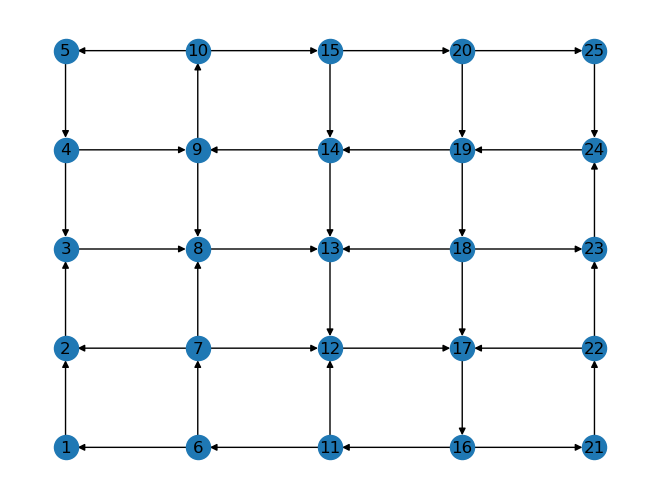

In [9]:
Gp = nx.MultiDiGraph()
Gp.add_edges_from(A)
pos = {}
for i in range(1,n+1):
    for j in range(1,n+1):
        pos[n*(i-1)+j] = (i,j) 
nx.draw(Gp,pos,with_labels=True)

In [10]:
kosaraju(nodes,A)

True

In [11]:
random.randint(0,100)

53

In [12]:
def get_neighbour_type1(nodes,edges,edge_index):
    stop = False
    neighbour = edges[:]
    affected = edges[edge_index]
    neighbour[i] = (affected[1],affected[0])
    return neighbour

In [13]:
def get_neighbour_type2(nodes,edges,node_index):
    neighbour = edges[:]
    for i in range(len(neighbour)):
        if nodes[node_index] in neighbour[i]:
            neighbour[i] = (neighbour[i][1],neighbour[i][0])
    return neighbour

In [14]:
neighbour2 = get_neighbour_type2(nodes,A,1)

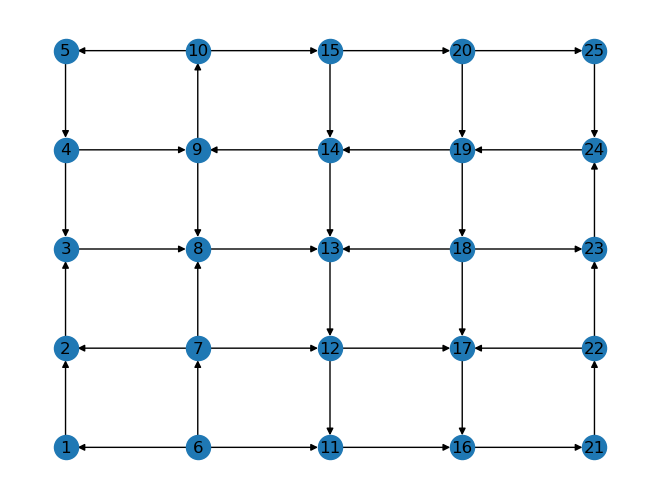

In [15]:
Gp = nx.MultiDiGraph()
Gp.add_edges_from(neighbour2)
pos = {}
for i in range(1,n+1):
    for j in range(1,n+1):
        pos[n*(i-1)+j] = (i,j) 
nx.draw(Gp,pos,with_labels=True)

In [16]:
print(kosaraju(nodes,neighbour2))

False


In [17]:
for e,p in zip(neighbour2,A):
    if e != p:
        print(e,p)

(11, 16) (16, 11)
(12, 11) (11, 12)
(6, 11) (11, 6)


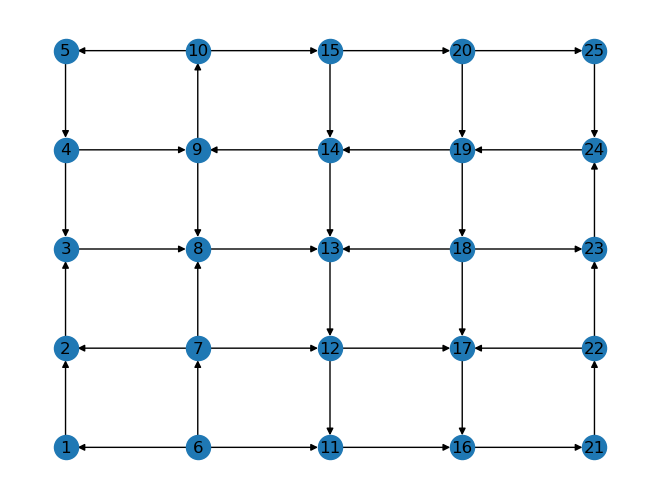

In [18]:
Gp = nx.MultiDiGraph()
Gp.add_edges_from(neighbour2)
pos = {}
for i in range(1,n+1):
    for j in range(1,n+1):
        pos[n*(i-1)+j] = (i,j) 
nx.draw(Gp,pos,with_labels=True)

In [19]:
def BFS(nodes,edges,n):
    Q = []
    V = [n]
    P = {n:-1}
    Q.append(n)
    while len(Q) != 0:
        v = Q.pop(0)
        for a in get_neighbours_out(edges,v):
            if a not in V:
                P[a] = v
                V.append(a)
                Q = [a] + Q
    return P

In [20]:
BFS(nodes,A,5)

{5: -1,
 4: 5,
 3: 4,
 9: 4,
 8: 9,
 10: 9,
 15: 10,
 14: 15,
 20: 15,
 19: 20,
 25: 20,
 24: 25,
 18: 19,
 13: 18,
 23: 18,
 17: 18,
 16: 17,
 21: 16,
 11: 16,
 12: 11,
 6: 11,
 1: 6,
 7: 6,
 2: 7,
 22: 21}

In [21]:
grid.nodes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

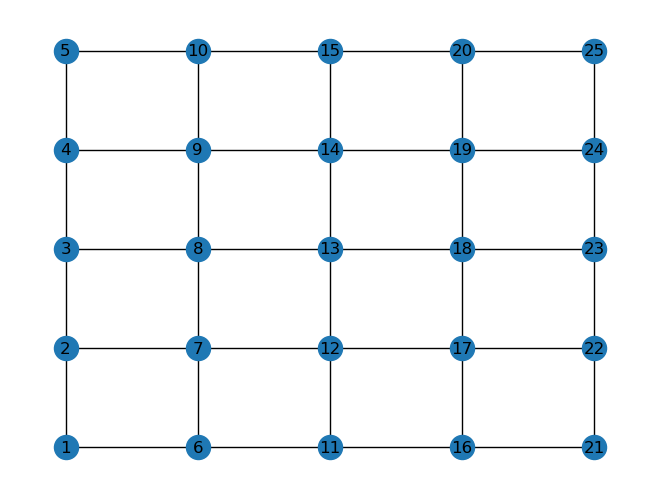

In [22]:
grid.showGraph()

In [23]:
bridges = grid.bridges()
print(list(grid.nodes))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [24]:
def get_directed_equivalent(edges):
    A = set()
    for (i,j) in edges:
        A.add((i,j))
        A.add((j,i))
    return list(A)

In [25]:
blocks = get_blockages(list(nodes),A,6)

In [26]:
edges = [e for e in A if e not in blocks]

In [27]:
nodes = set()
for (i,j) in edges:
    nodes.add(i)
    nodes.add(j)
    
nodes = list(nodes)

In [28]:
kosaraju(nodes,edges)

True

for n in range(6,11):
    grid = GridInstance(n)
    grid.generate_blockages(1)
    grid.save_dat_format()
    for j in range(1,3):
        grid.generate_blockages(2*j)
        grid.save_dat_format()

In [29]:
v,edges,req,blocks = read_instance("Instances/6x6/v_36_a60_r0_b2.dat")

In [30]:
instance = GraphInstance(edges=edges,blockages=blocks)

In [31]:
m = SNOPCompactModel(instance=instance)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-01


In [32]:
m.instance.blockages

[(18, 12), (11, 5)]

In [33]:
#m.solve()

In [34]:
m = GridInstance(n=10)

In [35]:
m.generate_blockages(4)

In [38]:
m.save_dat_format()

In [36]:
model = SNOPCompactModel(instance=m)

In [ ]:
model.

In [37]:
m